# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 06.10.2021

Мягкий дедлайн: 23:59MSK 25.10.2021

Жесткий дедлайн: 23:59MSK 28.10.2021

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [ ]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random

In [ ]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2021-10-26 12:51:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘data.txt.zip’

data.txt.zip        100%[===================>] 201.24M  22.4MB/s    in 10s     

2021-10-26 12:51:50 (20.1 MB/s) - ‘data.txt.zip’ saved [211011981/211011981]



In [ ]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

0         1         2         3   ...         87        88         89        90
0  2001  49.94357  21.47114  73.07750  ...   68.40795  -1.82223  -27.46348   2.26327
1  2001  48.73215  18.42930  70.32679  ...   70.49388  12.04941   58.43453  26.92061
2  2001  50.95714  31.85602  55.81851  ... -115.00698  -0.05859   39.67068  -0.66345
3  2001  48.24750  -1.89837  36.29772  ...  -72.08993   9.90558  199.62971  18.85382
4  2001  50.97020  42.20998  67.09964  ...   51.76631   7.88713   55.66926  28.74903

[5 rows x 91 columns]

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       515345 non-null  int64  
 1   1       515345 non-null  float64
 2   2       515345 non-null  float64
 3   3       515345 non-null  float64
 4   4       515345 non-null  float64
 5   5       515345 non-null  float64
 6   6       515345 non-null  float64
 7   7       515345 non-null  float64
 8   8       515345 non-null  float64
 9   9       515345 non-null  float64
 10  10      515345 non-null  float64
 11  11      515345 non-null  float64
 12  12      515345 non-null  float64
 13  13      515345 non-null  float64
 14  14      515345 non-null  float64
 15  15      515345 non-null  float64
 16  16      515345 non-null  float64
 17  17      515345 non-null  float64
 18  18      515345 non-null  float64
 19  19      515345 non-null  float64
 20  20      515345 non-null  float64
 21  21      51

In [ ]:
len(np.unique(y))

89

In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print("RMSE on train: ", mean_squared_error(y_train, y_pred_train, squared=False))
print("RMSE on test: ", mean_squared_error(y_test, y_pred_test, squared=False))

RMSE on train:  9.552822967905987
RMSE on test:  9.510160746337895


In [ ]:
alphas = np.array([0.01, 0.05, 0.1, 1, 5, 10])
rmses = np.array([])
for i in range(len(alphas)):
  ridge = Ridge(alphas[i])
  ridge.fit(X_train, y_train)
  rmses = np.append(rmses, np.sqrt(mean_squared_error(ridge.predict(X_test), y_test)))
print('Min rmse ' + str(np.min(rmses)) + ' with alpha ' + str(alphas[np.argmin(rmses)]))

Min rmse 9.51016070752747 with alpha 0.01


In [ ]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).reshape(-1)

In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train_scaled)
y_pred_train = y_scaler.inverse_transform(ridge.predict(X_train_scaled))
y_pred_test = y_scaler.inverse_transform(ridge.predict(X_test_scaled))

print("RMSE on train: ", mean_squared_error(y_train, y_pred_train, squared=False))
print("RMSE on test: ", mean_squared_error(y_test, y_pred_test, squared=False))

RMSE on train:  9.552822974530542
RMSE on test:  9.510161842816515


In [ ]:
alphas = np.array([0.01, 0.05, 0.1, 1, 5, 10])
rmses = np.array([])
for i in range(len(alphas)):
  ridge = Ridge(alphas[i])
  ridge.fit(X_train_scaled, y_train_scaled)
  rmses = np.append(rmses, np.sqrt(mean_squared_error(y_scaler.inverse_transform(ridge.predict(X_test_scaled)), y_scaler.inverse_transform(y_test_scaled))))
print('Min rmse ' + str(np.min(rmses)) + ' with alpha ' + str(alphas[np.argmin(rmses)]))

Min rmse 9.510160708617835 with alpha 0.01


In [ ]:
const_predict = np.mean(y_train)
const_predict

1998.3860949074324

In [ ]:
print("RMSE test on best constant: ", mean_squared_error(np.zeros_like(y_test) + const_predict, y_test, squared=False))

RMSE test on best constant:  10.85246390513634


## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [ ]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [ ]:
%%capture
!pip install wandb --upgrade

In [ ]:
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
set_random_seed(12345)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
from tqdm.notebook import tqdm
from IPython.display import clear_output

device = "cuda:0" if torch.cuda.is_available() else "cpu"

##Эксперимент 1. Архитектуры

###90-180-90-1

In [ ]:
X_train_scaled_tensor = torch.tensor(X_train_scaled)
y_train_scaled_tensor = torch.tensor(y_train_scaled)
train_scaled_set = TensorDataset(X_train_scaled_tensor.float(), y_train_scaled_tensor)
train_scaled_loader = DataLoader(
    train_scaled_set, 
    batch_size=128, 
    shuffle=True, 
    num_workers=2
)

X_test_scaled_tensor = torch.tensor(X_test_scaled)
y_test_scaled_tensor = torch.tensor(y_test_scaled)
test_scaled_set = TensorDataset(X_test_scaled_tensor.float(), y_test_scaled_tensor)
test_scaled_loader =  DataLoader(
    test_scaled_set, 
    batch_size=128, 
    shuffle=True, 
    num_workers=2
)

model = nn.Sequential(
    nn.Linear(90, 180),
    nn.ReLU(),
    nn.Linear(180, 90),
    nn.ReLU(),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = F.mse_loss

wandb.init(project="90-180-90-1")
wandb.watch(model)

wandb: Currently logged in as: ivankalimanov (use `wandb login --relogin` to force relogin)


[]

In [ ]:
def plot_history(train_history, val_history, title="loss"):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label="train", zorder=1)
    
    points = np.array(val_history)
    steps = list(range(0, len(train_history) + 1, int(len(train_history) / len(val_history))))[1:]
    
    plt.scatter(steps, val_history, marker='o', s=180, c="red", label="val", zorder=2)
    plt.xlabel("train steps")
    
    plt.legend(loc="best")
    plt.grid()

    plt.show()

In [ ]:
def train(model, optimizer, criterion, train_loader, test_loader, y_scaler, epoch_num):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
        y_scaler - sklearn.preprocessing.StandardScaler to inverse 
        transformation of predicts
        epoch_num - number of epochs
    '''
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    rmse_train_hist = []
    loss_train_hist = []
    rmse_val_hist = []
    loss_val_hist = []
    for epoch in range(epoch_num):
        train_loss = []
        train_mse = []
        for x_train, y_train in tqdm(train_loader):    
            x_train = x_train.to(device=device)
            y_train = y_train.to(device=device)
            y_pred = model(x_train).reshape(-1)                              
            loss = criterion(y_pred.float(), y_train.float())     
            loss.backward()                                
            optimizer.step()                              
            optimizer.zero_grad()                         
            train_loss.append(loss.cpu().data.numpy())         
            train_mse.append(
                mean_squared_error(
                  y_scaler.inverse_transform(y_pred.cpu().data), 
                  y_scaler.inverse_transform(y_train.cpu().data), 
                  )
                )
        rmse = np.sqrt(np.mean(train_mse))
        wandb.log({"Train loss": np.mean(train_loss),
              "Train rmse": rmse})
        
        clear_output()
        print(f"Epoch: {epoch}\n")
        print("Train\n")
        print(f"not transformed loss: {np.mean(train_loss)}, rmse: {rmse}")
        rmse_train_hist.append(rmse)
        loss_train_hist.append(np.mean(train_loss))
        

        val_loss = []                                 
        val_mse = []
        with torch.no_grad():                          
            for x_val, y_val in tqdm(test_loader):     
                x_val = x_val.to(device=device)
                y_val = y_val.to(device=device)
                y_pred = model(x_val).reshape(-1)                 
                loss = criterion(y_pred, y_val.long())       
                val_loss.append(loss.cpu().data.numpy())          
                val_mse.append(
                    mean_squared_error(
                        y_scaler.inverse_transform(y_pred.cpu().data), 
                        y_scaler.inverse_transform(y_val.cpu().data), 
                        )
                    )
          
        rmse = np.sqrt(np.mean(val_mse))

        wandb.log({"Validate loss": np.mean(val_loss),
                  "Validate rmse": rmse})
        

        print("Validate\n")
        print(f"not transformed loss: {np.mean(val_loss)}, rmse: {rmse}")

        rmse_val_hist.append(rmse)
        loss_val_hist.append(np.mean(val_loss))

        plot_history(loss_train_hist, loss_val_hist, "loss")
        plot_history(rmse_train_hist, rmse_val_hist, "rmse")
        
    return loss_train_hist, loss_val_hist, rmse_train_hist, rmse_val_hist


def test(model, criterion, test_loader, y_scaler):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    predicts = torch.tensor([])
    with torch.no_grad():                         
      for x_val, y_val in tqdm(test_loader):     
          x_val = x_val.to(device=device)
          y_val = y_val.to(device=device)
          y_pred = model(x_val).reshape(-1) 
          predicts = torch.cat((predicts, torch.tensor(y_scaler.inverse_transform(y_pred.cpu().data))), 0)
    print(predicts)
    return predicts

Epoch: 4

Train

not transformed loss: 0.5887510180473328, rmse: 8.394086118109964


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.49487605690956116, rmse: 8.819898841534275


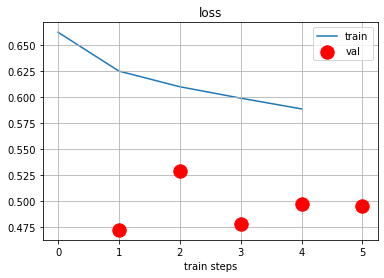

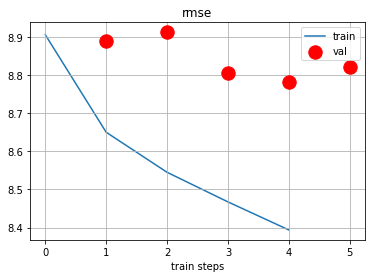

([0.6626034, 0.62517357, 0.610106, 0.5990962, 0.588751],
 [0.47214004, 0.5292949, 0.47738028, 0.49726498, 0.49487606],
 [8.905010523005776,
  8.649836542477253,
  8.544964605360725,
  8.467512458114621,
  8.394086118109964],
 [8.88897724065802,
  8.911617329756899,
  8.804535526012712,
  8.780814364661145,
  8.819898841534275])

In [ ]:
train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

In [ ]:
assert test(model, criterion, test_scaled_loader, y_scaler).shape[0] == y_test.shape[0]

  0%|          | 0/404 [00:00<?, ?it/s]

tensor([1999.8965, 1998.3519, 1984.6263,  ..., 1988.9443, 1997.2938,
        2001.4502])


###90-120-60-1

Epoch: 4

Train

not transformed loss: 0.5978926420211792, rmse: 8.459003251192652


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.5106156468391418, rmse: 8.842917702281571


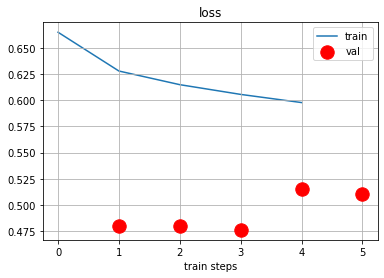

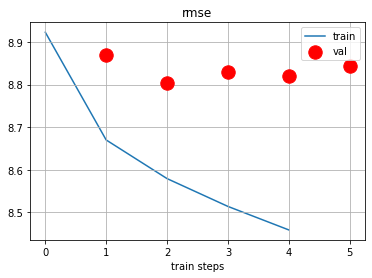

([0.6652281, 0.62809116, 0.61502993, 0.6057103, 0.59789264],
 [0.47923422, 0.47977364, 0.47594807, 0.5153322, 0.51061565],
 [8.922630796468747,
  8.669996704796198,
  8.579376464703822,
  8.514126404217137,
  8.459003251192652],
 [8.86986717706252,
  8.802464243672803,
  8.829857827036491,
  8.819711122444565,
  8.842917702281571])

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 120),
    nn.ReLU(),
    nn.Linear(120, 60),
    nn.ReLU(),
    nn.Linear(60, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = F.mse_loss

wandb.init(project="90-120-60-1")
wandb.watch(model)

train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

###90-60-30-1

Epoch: 4

Train

not transformed loss: 0.6128699779510498, rmse: 8.564298200287137


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.5115873217582703, rmse: 8.85959874720439


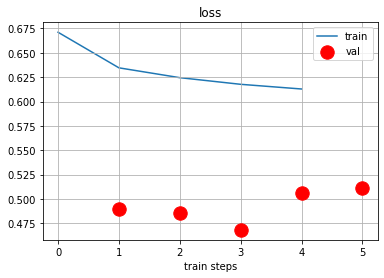

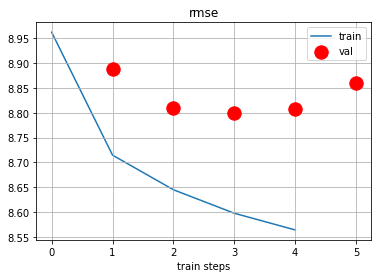

([0.67113686, 0.6346012, 0.6244958, 0.6176793, 0.61287],
 [0.48939887, 0.48545074, 0.4681872, 0.5064875, 0.5115873],
 [8.962169405071823,
  8.714812367999007,
  8.64514658205929,
  8.597835226179573,
  8.564298200287137],
 [8.88856220071413,
  8.809370673142123,
  8.799793884227219,
  8.807449015172804,
  8.85959874720439])

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 60),
    nn.ReLU(),
    nn.Linear(60, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = F.mse_loss

wandb.init(project="90-60-30-1")
wandb.watch(model)

train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

##Эксперимент 2. Добавить ли BatchNorm?

###BatchNorm на входе



Epoch: 4

Train

not transformed loss: 0.6034635901451111, rmse: 8.498320661134573


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.4863542914390564, rmse: 8.831967356613271


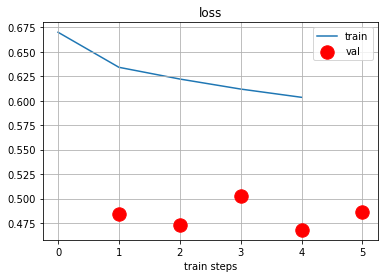

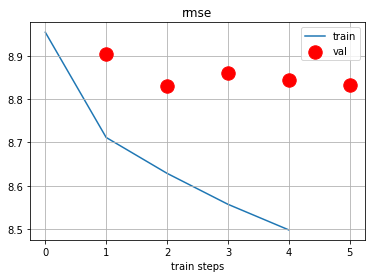

([0.66992253, 0.63411343, 0.62213475, 0.6118892, 0.6034636],
 [0.48409516, 0.47346783, 0.50260305, 0.46802068, 0.4863543],
 [8.954058069063743,
  8.711462790809545,
  8.628788512510162,
  8.557442450457993,
  8.498320661134573],
 [8.902896720124337,
  8.830001003174253,
  8.858962105886231,
  8.844444386532777,
  8.831967356613271])

In [ ]:
model = nn.Sequential(
    nn.BatchNorm1d(90),
    nn.Linear(90, 180),
    nn.ReLU(),
    nn.Linear(180, 90),
    nn.ReLU(),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

wandb.init(project="entry_batch_norm")
wandb.watch(model)

train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

###BatchNorm перед каждым полносвязным слоем

Epoch: 4

Train

not transformed loss: 0.610603392124176, rmse: 8.548446866339518


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.49328121542930603, rmse: 8.852585190144556


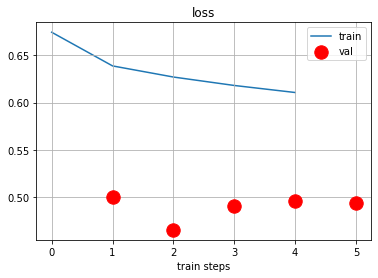

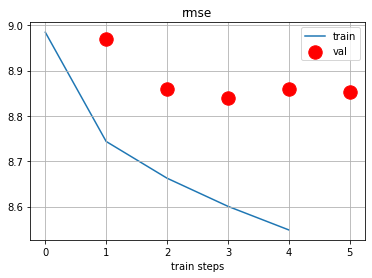

([0.6744706, 0.6387909, 0.62700635, 0.6180653, 0.6106034],
 [0.4995234, 0.46498862, 0.490768, 0.4957533, 0.49328122],
 [8.98440094418717,
  8.743532680138632,
  8.662506640426658,
  8.600521343216387,
  8.548446866339518],
 [8.969541536714768,
  8.859234766279844,
  8.840456242921192,
  8.858665692660002,
  8.852585190144556])

In [ ]:
model = nn.Sequential(
    nn.BatchNorm1d(90),
    nn.Linear(90, 180),
    nn.ReLU(),
    nn.BatchNorm1d(180),
    nn.Linear(180, 90),
    nn.ReLU(),
    nn.BatchNorm1d(90),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

wandb.init(project="batch_norm_before_linear")
wandb.watch(model)

train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

##Эксперимент 3. Оптимизатор

###Подбор гиперпараметров к Адаму

Epoch: 4

Train

not transformed loss: 0.5977180004119873, rmse: 8.45776771241548


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.4859248995780945, rmse: 8.831574370910479


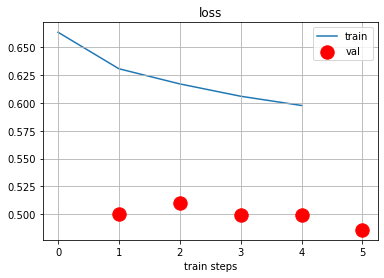

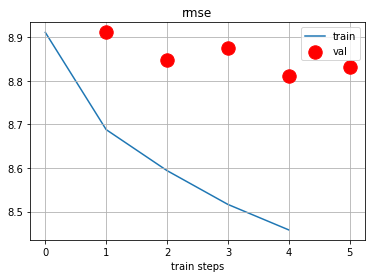

In [ ]:
lrs = np.arange(1e-4, 2e-3, 1e-4)

rmse_train = []
rmse_val = []


for lr in lrs:
  model_test_adam = nn.Sequential(
    nn.Linear(90, 180),
    nn.ReLU(),
    nn.Linear(180, 90),
    nn.ReLU(),
    nn.Linear(90, 1)
  ).to(device=device)
  optimizer_test_adam = torch.optim.Adam(model_test_adam.parameters(), lr=lr) 
  criterion_test_adam = F.mse_loss
  wandb.init(project="model_with_adam_lr=" + str(lr))
  wandb.watch(model_test_adam)
  _, _, rmse_train_hist, rmse_val_hist = train(model_test_adam, optimizer_test_adam, criterion_test_adam, train_scaled_loader, test_scaled_loader, y_scaler, 5)
  rmse_train.append(rmse_train_hist[-1])
  rmse_val.append(rmse_val_hist[-1])

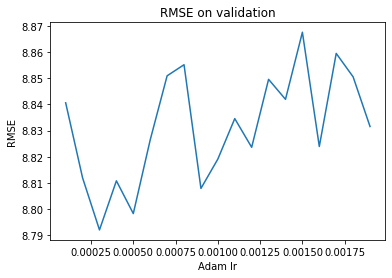

In [ ]:
plt.plot(lrs, rmse_val)
plt.title('RMSE on validation')
plt.xlabel('Adam lr')
plt.ylabel('RMSE')
plt.show()

In [ ]:
lrs[np.argmin(rmse_val)]

0.00030000000000000003

Epoch: 4

Train

not transformed loss: 0.5977899432182312, rmse: 8.458277241681268


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.5142710208892822, rmse: 8.794804986675246


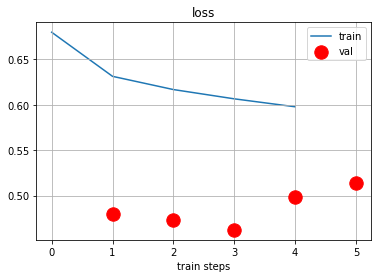

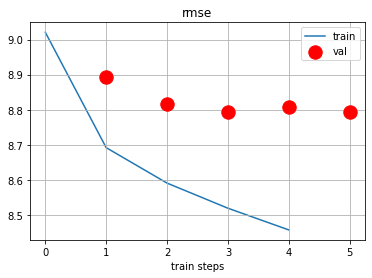

([0.6799263, 0.631337, 0.6167664, 0.6065506, 0.59778994],
 [0.47920138, 0.4729705, 0.46211323, 0.49798912, 0.514271],
 [9.020664142321817,
  8.692370361003604,
  8.591479425184627,
  8.520029868972399,
  8.458277241681268],
 [8.894485344470214,
  8.81779414898246,
  8.7951711583099,
  8.8075197970766,
  8.794804986675246])

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.ReLU(),
    nn.Linear(180, 90),
    nn.ReLU(),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = F.mse_loss

wandb.init(project="90-180-90-1lr=0.0003")
wandb.watch(model)


train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

###RMSProp

Epoch: 4

Train

not transformed loss: 0.5976222157478333, rmse: 8.457090246825897


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.496281236410141, rmse: 8.817318616176392


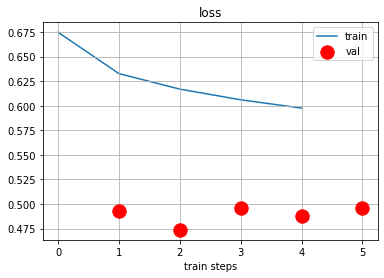

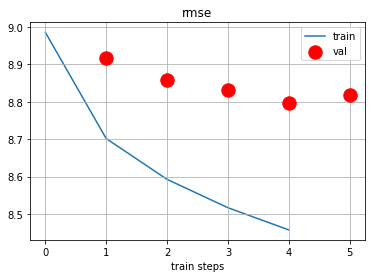

([0.674752, 0.6326958, 0.61690927, 0.60605085, 0.5976222],
 [0.4929442, 0.47371352, 0.49646345, 0.4874677, 0.49628124],
 [8.986274522542303,
  8.701719422537503,
  8.592474431498083,
  8.516519742324611,
  8.457090246825897],
 [8.916171179109703,
  8.858522507090848,
  8.832279817041986,
  8.796576721958507,
  8.817318616176392])

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.ReLU(),
    nn.Linear(180, 90),
    nn.ReLU(),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.RMSprop(model.parameters(), lr=0.0003)
criterion = F.mse_loss

wandb.init(project="rmsprop")
wandb.watch(model)

train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

###SGD

Epoch: 4

Train

not transformed loss: 0.8002808690071106, rmse: 9.786531850648407


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.4471468925476074, rmse: 9.700203076820102


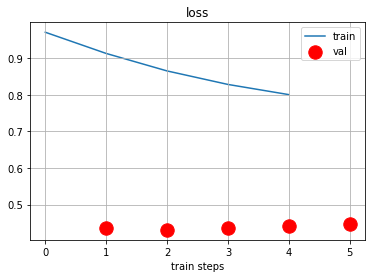

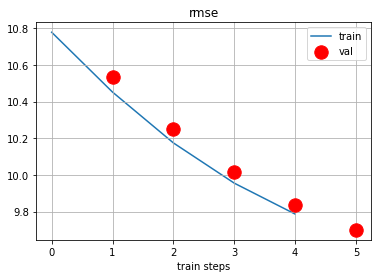

([0.9705914, 0.9127172, 0.86496645, 0.82808304, 0.80028087],
 [0.43526697, 0.430849, 0.4361974, 0.44207543, 0.4471469],
 [10.777693255658571,
  10.451430428709788,
  10.17436321568112,
  9.955075364815643,
  9.786531850648407],
 [10.532658242817611,
  10.251111773351939,
  10.014271097914534,
  9.837820574740821,
  9.700203076820102])

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.ReLU(),
    nn.Linear(180, 90),
    nn.ReLU(),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.0003)
criterion = F.mse_loss

wandb.init(project="sgd")
wandb.watch(model)

train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

Epoch: 4

Train

not transformed loss: 0.7316403985023499, rmse: 9.357426884314336


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.4726635813713074, rmse: 9.34530829543664


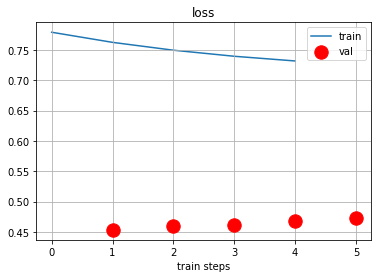

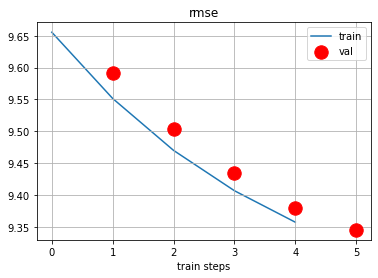

([0.7789727, 0.7623029, 0.7493622, 0.7393817, 0.7316404],
 [0.45324934, 0.45892772, 0.4614155, 0.46716946, 0.47266358],
 [9.655365394339265,
  9.551495472928272,
  9.470076420670122,
  9.406800922135291,
  9.357426884314336],
 [9.590684439425972,
  9.503061070897791,
  9.434114907479817,
  9.379853883614164,
  9.34530829543664])

In [ ]:
train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

Epoch: 4

Train

not transformed loss: 0.7091927528381348, rmse: 9.212759604998483


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.4794592559337616, rmse: 9.216638259385928


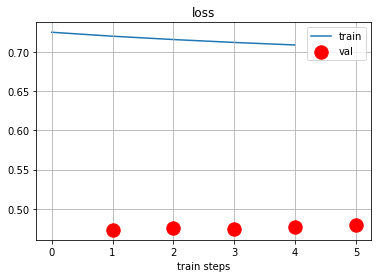

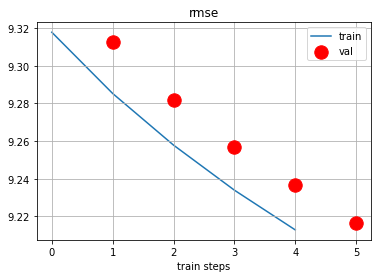

([0.72546685, 0.7204061, 0.71615106, 0.7124495, 0.70919275],
 [0.47304028, 0.4754755, 0.47401875, 0.47641477, 0.47945926],
 [9.317864491965127,
  9.285307644150903,
  9.25784500248756,
  9.233889053002589,
  9.212759604998483],
 [9.312474938196427,
  9.281870388553914,
  9.257093951278762,
  9.23667169177801,
  9.216638259385928])

In [ ]:
train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

##Эксперимент 4. Dropout

Epoch: 4

Train

not transformed loss: 0.6174056529998779, rmse: 8.595930742823974


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.47892865538597107, rmse: 8.83748560838997


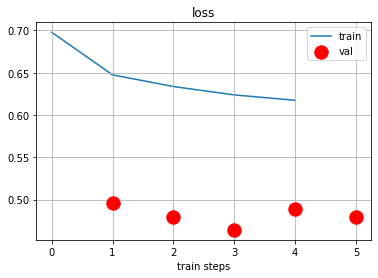

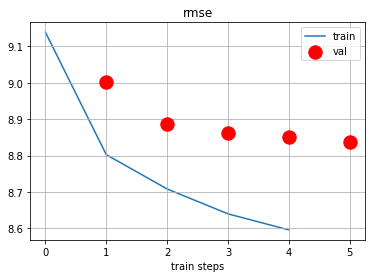

([0.6978766, 0.64745194, 0.6336606, 0.6237598, 0.61740565],
 [0.4953917, 0.479527, 0.46409002, 0.4885887, 0.47892866],
 [9.138962804255327,
  8.80260772204711,
  8.708351703389765,
  8.640051091556597,
  8.595930742823974],
 [9.001200302048032,
  8.887327446757086,
  8.861147694023268,
  8.851917297324674,
  8.83748560838997])

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(180, 90),
    nn.ReLU(),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = F.mse_loss

wandb.init(project="90-180-90-1dropout=0.2")
wandb.watch(model)

train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

Epoch: 4

Train

not transformed loss: 0.59487384557724, rmse: 8.43762158716297


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.4974512457847595, rmse: 8.835496250472136


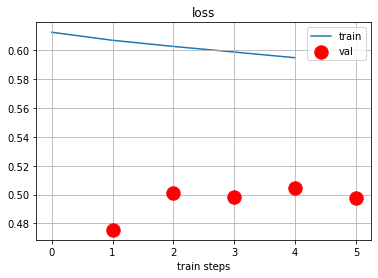

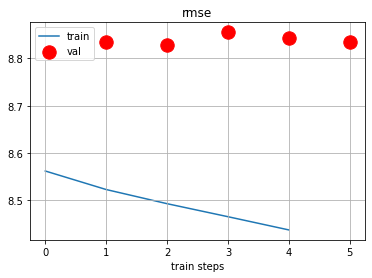

([0.6125443, 0.6069592, 0.6027124, 0.59881717, 0.59487385],
 [0.4755241, 0.5014444, 0.49827176, 0.50454515, 0.49745125],
 [8.562022412023447,
  8.522899239913082,
  8.493030268159371,
  8.465540960728504,
  8.43762158716297],
 [8.835052906927896,
  8.828026667135097,
  8.855050327816517,
  8.843868545465513,
  8.835496250472136])

In [ ]:
train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

Epoch: 4

Train

not transformed loss: 0.6491544842720032, rmse: 8.814174026330162


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.4680827558040619, rmse: 8.931178001353961


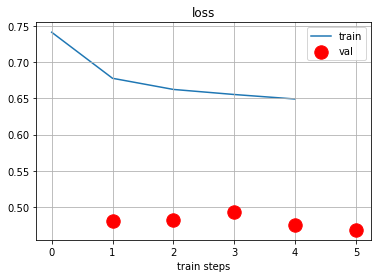

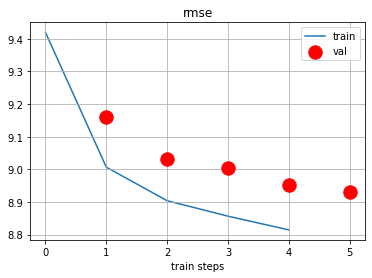

In [ ]:
ps = np.arange(0.1, 0.7, 0.1)
rmse_val_hist = []
for p in ps:  
  model = nn.Sequential(
      nn.Linear(90, 180),
      nn.ReLU(),
      nn.Dropout(p=p),
      nn.Linear(180, 90),
      nn.ReLU(),
      nn.Linear(90, 1)
  ).to(device=device)

  optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
  criterion = F.mse_loss

  wandb.init(project="90-180-90-1 p= " + str(p))
  wandb.watch(model)

  _, _, _, rmse_val = train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)
  rmse_val_hist.append(rmse_val)

In [ ]:
rmse_val_hist

[[8.894143261798492,
  8.895593289728557,
  8.83201177183383,
  8.86631136693025,
  8.904754870833056],
 [8.962034383723612,
  8.89252105482506,
  8.966394008859947,
  8.866028037445917,
  8.880294737883684],
 [8.986515860941507,
  8.93208334787034,
  8.920293521211388,
  8.906524936750712,
  8.93056450558004],
 [8.983607190500775,
  8.94221678376794,
  8.93682322361225,
  8.923763967969936,
  8.940951030303198],
 [9.01999871930663,
  9.000484165123172,
  8.986647743228316,
  8.97323312814693,
  8.955492021426666],
 [9.042831655056808,
  9.04437430304967,
  9.042999168019918,
  8.978963899013443,
  8.997676543927692]]

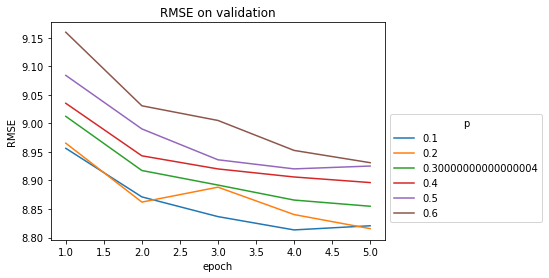

In [ ]:
plt.plot(np.arange(1, 6, 1), np.array(rmse_val_hist).T)
plt.legend(ps, title="p", bbox_to_anchor=(1, 0.6))
plt.title('RMSE on validation')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.show()

Epoch: 9

Train

not transformed loss: 0.6064394116401672, rmse: 8.519248792855217


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.48854970932006836, rmse: 8.842605684775426


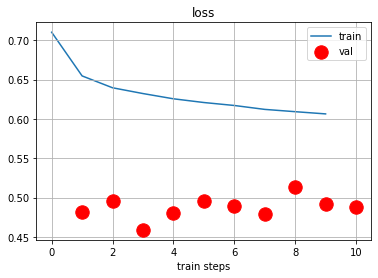

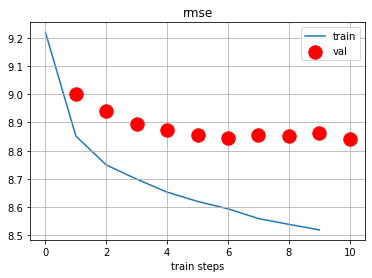

([0.7102859,
  0.6547437,
  0.6396614,
  0.63231397,
  0.62564474,
  0.6209108,
  0.6171435,
  0.6121722,
  0.6092575,
  0.6064394],
 [0.48189053,
  0.4956084,
  0.458891,
  0.48099014,
  0.49625254,
  0.48876086,
  0.47943062,
  0.51354,
  0.49248168,
  0.4885497],
 [9.219857180425288,
  8.852037567771813,
  8.74948837507004,
  8.699093076835341,
  8.653095818908788,
  8.620296738470122,
  8.594105825986505,
  8.559421173816927,
  8.539020518763554,
  8.519248792855217],
 [9.002162172447317,
  8.93997305028575,
  8.894916109448783,
  8.873629354620446,
  8.855337350533539,
  8.845264020338709,
  8.856038404689224,
  8.851403423107977,
  8.861533975907276,
  8.842605684775426])

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(180, 90),
    nn.ReLU(),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = F.mse_loss

wandb.init(project="90-180-90-1p=0.5")
wandb.watch(model)

train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 10)

Epoch: 9

Train

not transformed loss: 0.6149508357048035, rmse: 8.578824328117427


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.4915545582771301, rmse: 8.857107403882736


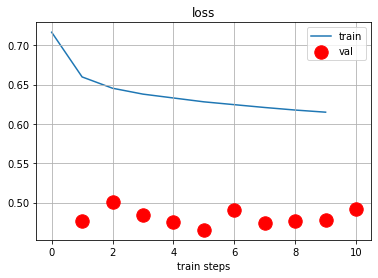

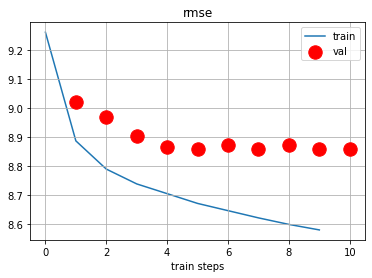

([0.7166838,
  0.6598163,
  0.64542896,
  0.6379318,
  0.6330323,
  0.6281334,
  0.6245186,
  0.6209249,
  0.61767787,
  0.61495084],
 [0.47634956,
  0.50060487,
  0.4842639,
  0.47473282,
  0.465129,
  0.48998308,
  0.47371998,
  0.47639292,
  0.4780673,
  0.49155456],
 [9.26128807851407,
  8.886262643866436,
  8.788845782101383,
  8.737651664947888,
  8.704033118315479,
  8.670288730502183,
  8.645304243806025,
  8.620394309133866,
  8.59782545984941,
  8.578824328117427],
 [9.019993194670567,
  8.969476733771709,
  8.90300298962132,
  8.865701007728553,
  8.859168903813167,
  8.870819582746952,
  8.857419612127673,
  8.870595564235755,
  8.856626667724507,
  8.857107403882736])

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.ReLU(),
    nn.Dropout(p=0.4),
    nn.Linear(180, 90),
    nn.ReLU(),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = F.mse_loss

wandb.init(project="90-180-90-1p=0.4")
wandb.watch(model)

train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 10)

###Два Dropout

Epoch: 9

Train

not transformed loss: 0.6053720116615295, rmse: 8.511747935096519


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.4911872148513794, rmse: 8.847903738614754


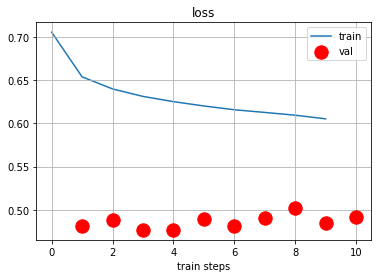

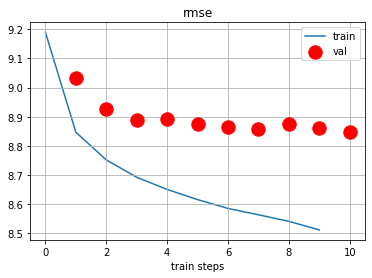

([0.7056303,
  0.65397596,
  0.63999575,
  0.631328,
  0.62527007,
  0.620258,
  0.61589026,
  0.6127722,
  0.6095588,
  0.605372],
 [0.48126292,
  0.48876667,
  0.47715253,
  0.47672892,
  0.48992205,
  0.48107797,
  0.4902461,
  0.5020943,
  0.48463607,
  0.4911872],
 [9.189591659881426,
  8.846846539510834,
  8.751774529197153,
  8.69230813936615,
  8.65050430840088,
  8.6157636326071,
  8.585374821810605,
  8.563615214024594,
  8.541131698797097,
  8.511747935096519],
 [9.03404313984713,
  8.926572552802206,
  8.887170874141514,
  8.891518382413475,
  8.87479056663156,
  8.865915511997017,
  8.857177722066549,
  8.873740747340102,
  8.862906483955012,
  8.847903738614754])

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(180, 90),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = F.mse_loss

wandb.init(project="90-180-90-1dropoutx2=0.2")
wandb.watch(model)

train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 10)

Epoch: 4

Train

not transformed loss: 0.5935017466545105, rmse: 8.427885224881082


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.504224956035614, rmse: 8.938335471996355


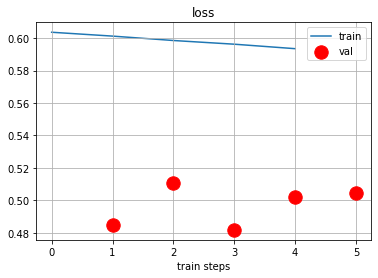

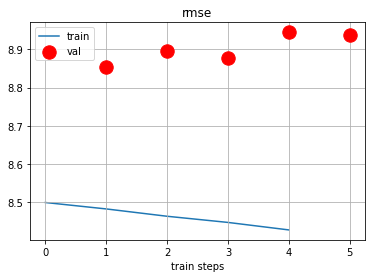

([0.603636, 0.60125303, 0.598539, 0.59626424, 0.59350175],
 [0.4849205, 0.5104178, 0.48175398, 0.501905, 0.50422496],
 [8.499535282781904,
  8.482741951129485,
  8.463574765549291,
  8.447476322490925,
  8.427885224881082],
 [8.853423992743037,
  8.89471797671879,
  8.877540062027107,
  8.944455983302204,
  8.938335471996355])

In [ ]:
train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

##Эксперимент 5. Функция активации

###LeakyReLu

Epoch: 4

Train

not transformed loss: 0.5978294610977173, rmse: 8.45855678324847


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.4842160642147064, rmse: 8.778911127430153


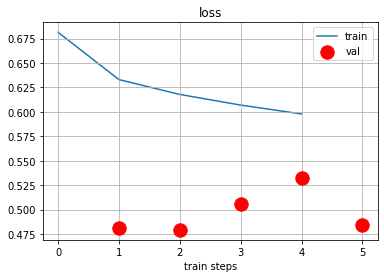

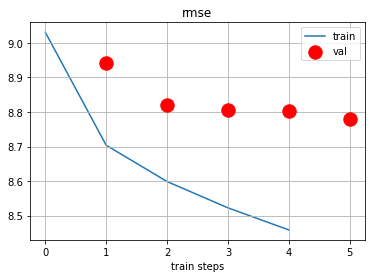

([0.6814536, 0.6329904, 0.61779004, 0.60690683, 0.59782946],
 [0.48086226, 0.47913575, 0.5060202, 0.53200114, 0.48421606],
 [9.030789537390444,
  8.703745124855004,
  8.598606276661416,
  8.522531651720104,
  8.45855678324847],
 [8.94101674919271,
  8.820256079665356,
  8.804675908152571,
  8.802880506635468,
  8.778911127430153])

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.LeakyReLU(),
    nn.Linear(180, 90),
    nn.LeakyReLU(),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = F.mse_loss

wandb.init(project="90-180-90-1LeakyReLU")
wandb.watch(model)


train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

Epoch: 4

Train

not transformed loss: 0.6006425023078918, rmse: 8.47843376094779


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.501383364200592, rmse: 8.824055501372507


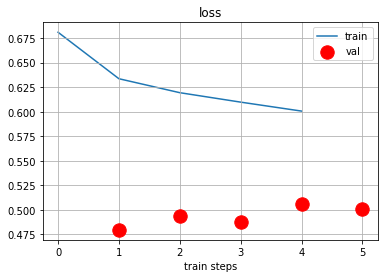

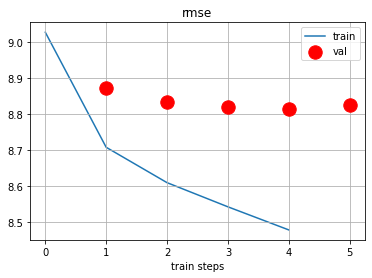

In [ ]:
negative_slopes = np.arange(0.01, 0.1, 0.01)
rmse_val_hist = []
for ns in negative_slopes:  
  model = nn.Sequential(
    nn.Linear(90, 180),
    nn.LeakyReLU(negative_slope=ns),
    nn.Linear(180, 90),
    nn.LeakyReLU(),
    nn.Linear(90, 1)
  ).to(device=device)

  optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
  criterion = F.mse_loss

  wandb.init(project="90-180-90-1 negative_slope= " + str(ns))
  wandb.watch(model)

  _, _, _, rmse_val = train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)
  rmse_val_hist.append(rmse_val)

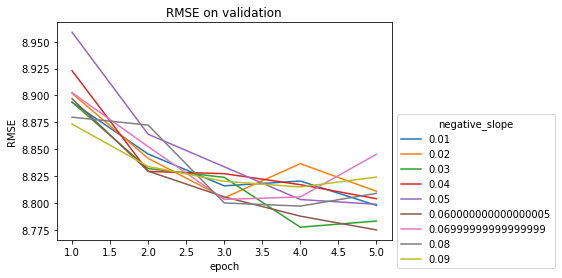

In [ ]:
plt.plot(np.arange(1, 6, 1), np.array(rmse_val_hist).T)
plt.legend(negative_slopes, title="negative_slope", bbox_to_anchor=(1, 0.6))
plt.title('RMSE on validation')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.show()

##Итог

Epoch: 4

Train

not transformed loss: 0.5995031595230103, rmse: 8.470388779534384


  0%|          | 0/404 [00:00<?, ?it/s]

Validate

not transformed loss: 0.48817896842956543, rmse: 8.78863480326945


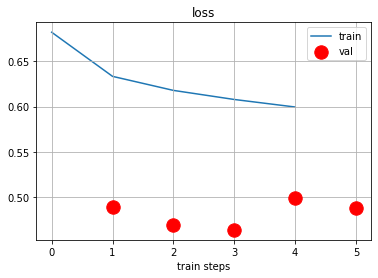

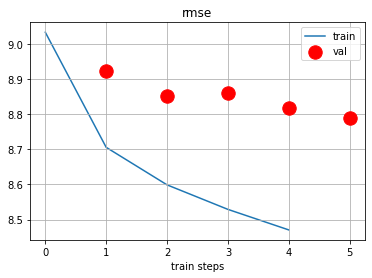

([0.6819209, 0.6332934, 0.6178219, 0.60781795, 0.59950316],
 [0.4898066, 0.4691645, 0.4640469, 0.49924228, 0.48817897],
 [9.033885751416769,
  8.705827795758086,
  8.59882784200491,
  8.528926608637768,
  8.470388779534384],
 [8.924100986367817,
  8.853530388443728,
  8.861661785347192,
  8.81778810711739,
  8.78863480326945])

In [ ]:
model = nn.Sequential(
    nn.Linear(90, 180),
    nn.LeakyReLU(negative_slope=0.06),
    nn.Linear(180, 90),
    nn.LeakyReLU(),
    nn.Linear(90, 1)
).to(device=device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = F.mse_loss

wandb.init(project="90-180-90-1LeakyReLU0.06")
wandb.watch(model)


train(model, optimizer, criterion, train_scaled_loader, test_scaled_loader, y_scaler, 5)

In [ ]:
test_scaled_set = TensorDataset(X_test_scaled_tensor.float(), y_test_scaled_tensor)
test_scaled_loader =  DataLoader(
    test_scaled_set, 
    batch_size=128, 
    shuffle=False, 
    num_workers=2
)

In [ ]:
mean_squared_error(test(model, criterion, test_scaled_loader, y_scaler), torch.tensor(y_scaler.inverse_transform(y_test_scaled)), squared=False)

  0%|          | 0/404 [00:00<?, ?it/s]

tensor([2002.1254, 2001.5121, 2001.0223,  ..., 1998.5223, 2000.2968,
        2002.1987])


8.787451556409783

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

###Эксперимент 1. Выбор архитектуры

Я попровал три архитектуры только с изменением кол-ва нейронов в трёх полносвязных слоях: 90-180-90-1, 90-120-60-1 и 90-60-30-1. Самой успешной оказалась первая.

###Эксперимент 2. Добавление BatchNorm

Я попробовал добавить его перед первым полносвязным слоем и перед каждым. Качество не улучшилось

###Эксперимент 3. Оптимизатор

Сначала я подбирал lr для Адама. Лучшим оказалось 0.0003. Затем попробовал RMSProp, который показал качество хуже. SGD стабильно падал на валидации и на тесте (линии шли почти параллельно), но это было медленно, и мне не хватило 20 эпох, чтобы приблизить его к значениям, которые Адам выдавал за 5 эпох.

###Эксперимент 4. Dropout
Сначала попробовал один Dropout-слой с вероятностью 0.2. Качество падает медленнее, но не переобучается. Но на бОльшем кол-ве эпох все равно начинается переобучение. При этом значения не доходят до нужных. Также подбирал разные p. На графике видно, как зависит качество от вероятности. Чем она больше, тем выше линия RMSE.  Наверное, есть правильный способ применить Dropout в моем случае, чтобы показать лучшее качество

###Эксперимент 5. Функция активации
Здесь я попробовал вместо ReLU взять LeakyReLU и подобрать параметры. Это помогло. Моё лучшее качество 8.78